In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv2D(200, (3, 3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/20
39/39 [==============================] - ETA: 0s - loss: 0.4920 - accuracy: 0.7630INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


39/39 [==============================] - 79s 2s/step - loss: 0.4920 - accuracy: 0.7630 - val_loss: 0.2194 - val_accuracy: 0.9123
Epoch 2/20
39/39 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9373INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


39/39 [==============================] - 69s 2s/step - loss: 0.1870 - accuracy: 0.9373 - val_loss: 0.1122 - val_accuracy: 0.9513
Epoch 3/20
39/39 [==============================] - 67s 2s/step - loss: 0.1549 - accuracy: 0.9479 - val_loss: 0.1478 - val_accuracy: 0.9448
Epoch 4/20
39/39 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.9748INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


39/39 [==============================] - 69s 2s/step - loss: 0.0906 - accuracy: 0.9748 - val_loss: 0.1063 - val_accuracy: 0.9643
Epoch 5/20
39/39 [==============================] - 72s 2s/step - loss: 0.0711 - accuracy: 0.9829 - val_loss: 0.1192 - val_accuracy: 0.9545
Epoch 6/20
39/39 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.9845INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


39/39 [==============================] - 75s 2s/step - loss: 0.0463 - accuracy: 0.9845 - val_loss: 0.0975 - val_accuracy: 0.9643
Epoch 7/20
39/39 [==============================] - 70s 2s/step - loss: 0.0355 - accuracy: 0.9870 - val_loss: 0.1519 - val_accuracy: 0.9545
Epoch 8/20
39/39 [==============================] - 71s 2s/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.1013 - val_accuracy: 0.9643
Epoch 9/20
39/39 [==============================] - 71s 2s/step - loss: 0.0224 - accuracy: 0.9919 - val_loss: 0.1576 - val_accuracy: 0.9448
Epoch 10/20
39/39 [==============================] - 71s 2s/step - loss: 0.0208 - accuracy: 0.9927 - val_loss: 0.1327 - val_accuracy: 0.9643
Epoch 11/20
39/39 [==============================] - 71s 2s/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.1298 - val_accuracy: 0.9675
Epoch 12/20
39/39 [==============================] - 71s 2s/step - loss: 0.0102 - accuracy: 0.9976 - val_loss: 0.1272 - val_accuracy: 0.9545
Epoch 13/20
39/39 [=========

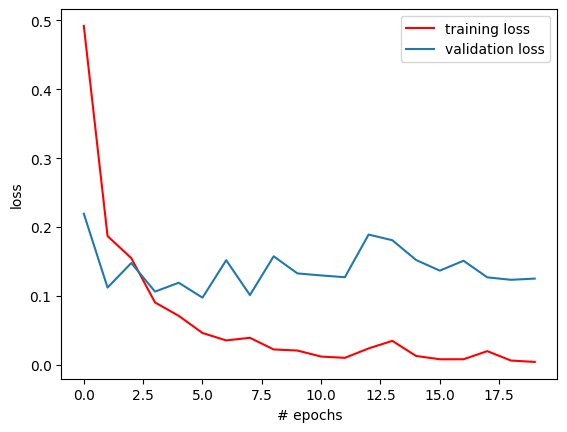

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

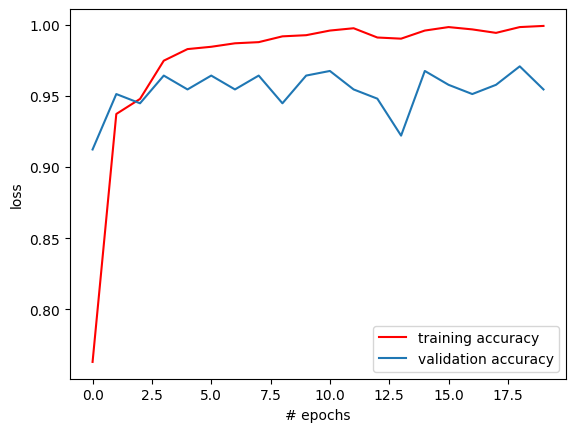

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

6/6 [==============================] - 3s 454ms/step - loss: 0.0995 - accuracy: 0.9825
[0.09951784461736679, 0.9824561476707458]
